# Práctica 1 - Self-Organising Maps
## Preparación de entorno
#### Importar librerías de código

In [241]:
%reset
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

Nothing done.


#### Dataset que se va a utilizar para el entrenamiento

In [242]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_min = 0
valor_max = 256     #256 porque el valor máximo es exclusivo, es decir, irá de 0 a 255
valores_color = 3
num_colores = 100
datos = np.random.randint(valor_min, valor_max, (num_colores, valores_color))
print(f"La matriz de 100 colores:\n",datos)







La matriz de 100 colores:
 [[195 154 199]
 [ 73 235 124]
 [146  16  75]
 [248 190  24]
 [ 48 149 111]
 [251  76 203]
 [208 166 153]
 [133  84 106]
 [226 159  18]
 [180 120 229]
 [130  71 169]
 [ 87 101  73]
 [157 242 117]
 [ 11  93 223]
 [ 47 243 180]
 [ 53 118  84]
 [155  58 129]
 [ 29  63  35]
 [214  41 128]
 [118  34 209]
 [ 65  16  16]
 [249  21 218]
 [ 91  29  87]
 [243 158  18]
 [ 24 255  46]
 [213 223   6]
 [103  16  46]
 [ 59 144 218]
 [235 137 191]
 [229 214   6]
 [222 176 130]
 [174  36  91]
 [244  90 189]
 [254 210  94]
 [243 125 118]
 [140 211 201]
 [255 172  42]
 [149   8   3]
 [101 166 113]
 [227 122  21]
 [ 37  90  71]
 [153   1  77]
 [  8 222  14]
 [ 26 173 244]
 [ 98   6 242]
 [200 200  31]
 [157 181  62]
 [ 15 141 112]
 [  5 181 201]
 [251 168 195]
 [253 109 165]
 [ 17  91 252]
 [ 10 240 104]
 [ 72 106 230]
 [222  40 169]
 [ 57 154  24]
 [ 66  34  23]
 [  8  12 185]
 [243 110  65]
 [192   6  48]
 [ 32  97 240]
 [156 227 166]
 [246 129 232]
 [ 44  45 165]
 [ 61 130  86

## SOM Setup
#### Variables definidas por el alumno

In [243]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 50
periodo = 1000
learning_rate = 0.15
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [244]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.

num_entradas = len(datos[0])   #Usamos len para contar el numero de filas y columnas
num_datos = len(datos)     

def obtener_Entrada(datos):
   valor_aleatorio = np.random.randint(0,100)
   return datos[valor_aleatorio]

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
# Calculamos el valor maximo de la matriz

valor_maximo = 0
for dato in datos:
    for valor in dato:
        if(valor_maximo < valor):
            valor_maximo = valor  
      
if normalizar_datos:
    datos = datos/valor_max    
    
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
#matriz_pesos = np.random.random((dimensiones de la matriz de pesos))

matriz_pesos = np.random.random((lado_mapa*lado_mapa,num_entradas))
print(matriz_pesos)


[[0.72278153 0.42228099 0.46812672]
 [0.29075651 0.00999534 0.00704928]
 [0.3596779  0.31549522 0.90863342]
 ...
 [0.20220495 0.86543158 0.27237741]
 [0.97561129 0.03078997 0.73173172]
 [0.83414634 0.54715483 0.86708055]]


#### Funciones para entrenar/clasificar

In [245]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

def calcular_bmu(patron_entrada, matriz_pesos, m):
   
   """
    Diferencias es un array de 3 elementos que tendrá el cuadrado de la resta de la entrada menos el peso para calcular la distancia euclídea que
    terminará calculándose en distancia local haciendo la raíz de la suma de los valores anteriores.
   
   """
   distancia_local = 0                      
   distancia_minima = float('inf')
   diferencias = np.zeros(m)
   bmu = []
   bmu_idx = ()

   for i in range(len(matriz_pesos)):
      for j in range(m):
         diferencias[j] = (patron_entrada[j] - matriz_pesos[i,j]) ** 2
      """

      Distancia local tendrá la distancia que se esté calculando en el momento, es decir, en la primera iteración tendrá la distancia de la 
      neurona 0,0 al patrón de entrada, después la de 0,1 y así sucesivamente.
      Si la distancia local es menor que la distancia mínima consideraremos esa neurona como la bmu. En la primera iteración la primera neurona 
      será la bmu ya que distancia mínima está inicializada a infinito.
      
      """
      distancia_local = np.sqrt(np.sum(diferencias))
      if(distancia_local < distancia_minima):
         distancia_minima = distancia_local
         bmu = matriz_pesos[i]
         bmu_idx = (i//lado_mapa,i%lado_mapa)

   # Por último retornamos la bmu y su posición
   return bmu, bmu_idx
           
patron_entrada = obtener_Entrada(datos)     
bmu, bmu_idx = calcular_bmu(patron_entrada, matriz_pesos, num_entradas)
print(f"El patrón de entrada es:\n",patron_entrada)
print(f"Y la BMU es:")
print(f"Valor:",bmu,"\nPosicion:",bmu_idx)

    
    

El patrón de entrada es:
 [0.05859375 0.55078125 0.4375    ]
Y la BMU es:
Valor: [0.02141193 0.53561762 0.42960044] 
Posicion: (2, 32)


In [246]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
#Aplicamos la función para calcular la variación de lr
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial * (1-(i/n_iteraciones)) 

In [247]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
   return 1 + vecindario_inicial * (1-(i/n_iteraciones))

In [248]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU / (2* (vecindario_actual**2)))

#### Funciones para dibujar la salida de la red

In [249]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores, titulo):
    
    # Reformateamos la matriz de pesos de (100, 3) a (10, 10, 3)
    mapa_colores = matriz_pesos.reshape((lado_mapa, lado_mapa, 3))
    # Mostramos la imagen con los colores RGB
    plt.figure(figsize=(6, 6))
    plt.imshow(mapa_colores, aspect='equal')
    plt.title(titulo)
    plt.axis("off")  # Quitamos los ejes para mejor visualización
    plt.show()





## SOM Entrenamiento

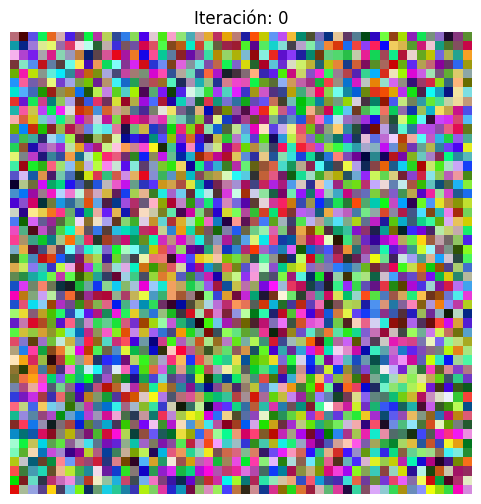

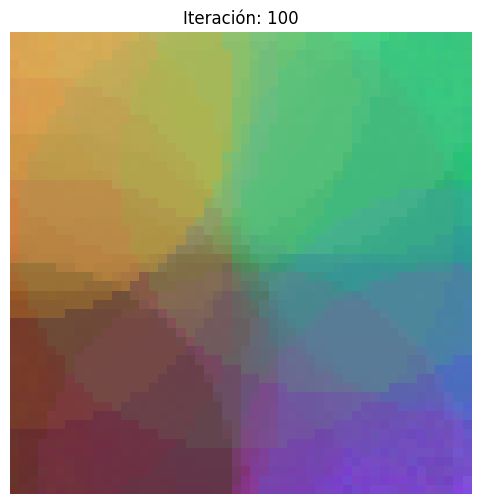

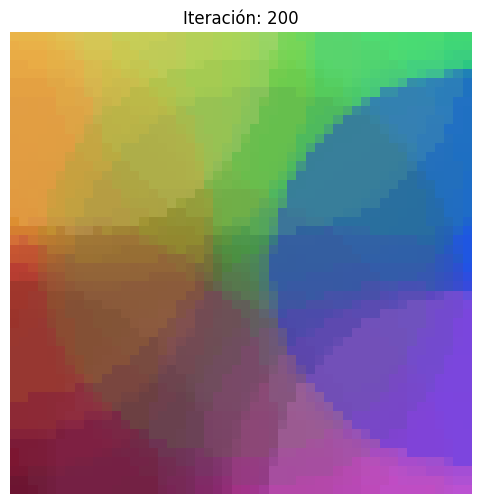

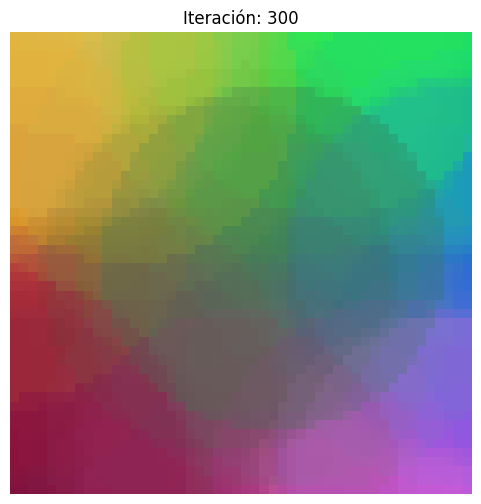

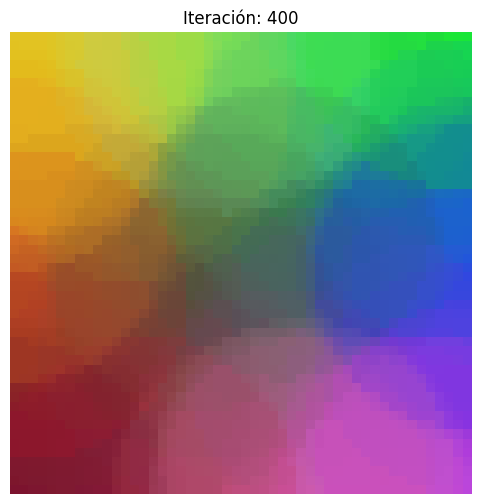

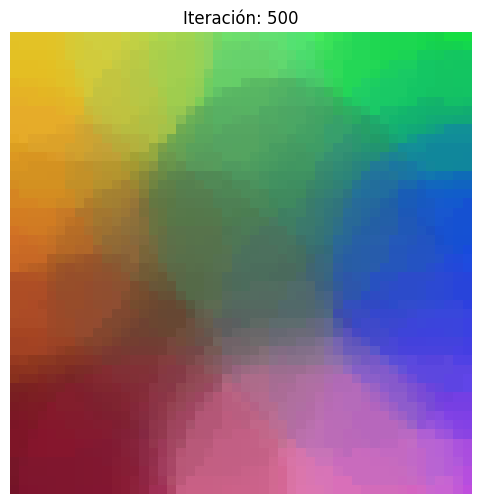

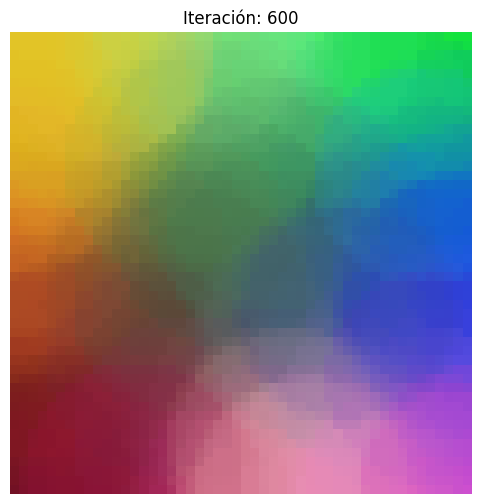

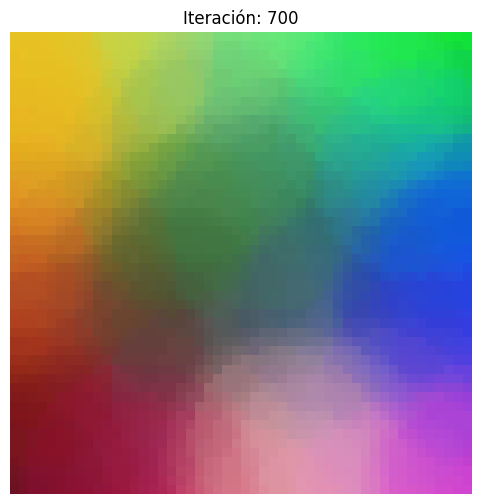

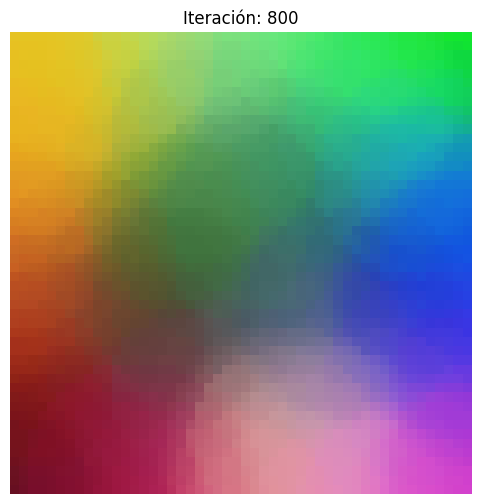

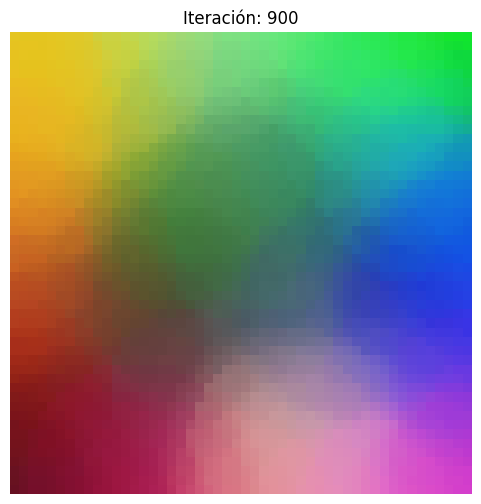

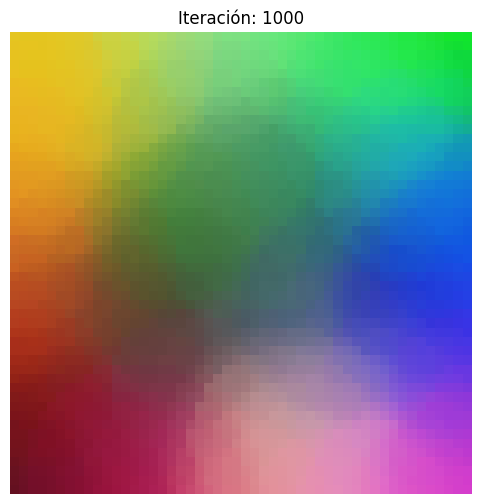

In [250]:
# Bucle principal


for i in range(periodo+1):
    if i % 100 == 0:
        pintar_mapa(matriz_pesos, f"Iteración: {i}")
    
    # Obtenemos el patrón de entrada ya normalizado
    patron_entrada = obtener_Entrada(datos)
    
    # Encontramos la bmu y calculamos eta y v
    bmu, bmu_idx = calcular_bmu(patron_entrada, matriz_pesos, num_entradas)
    eta = variacion_learning_rate(learning_rate, i, periodo)
    v = variacion_vecindario(vecindario, i, periodo)
    
    # Actualiza la matriz de pesos
    for j in range(len(matriz_pesos)):
        # Coordenadas de la neurona en la matriz
        x = j // lado_mapa
        y = j % lado_mapa
        
        # Calcula la distancia euclídea 2D respecto a la BMU
        distancia_BMU = np.sqrt((x - bmu_idx[0])**2 + (y - bmu_idx[1])**2)
        
        # Si está dentro del vecindario, actualizar pesos
        if distancia_BMU <= v:
            amortiguacion = decay(distancia_BMU, v)
            matriz_pesos[j] += eta * amortiguacion * (patron_entrada - matriz_pesos[j])



    

    



## SOM Clasificación

In [251]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [252]:
# Clasifica nuevos patrones

